In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [89]:
df1 = pd.read_csv('Lab_customer_analysis_round_2.csv')
df1

,Unnamed: 0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_month
0,0,PB63095,Washington,5568.947534,Yes,Extended,High School or Below,2011-01-01,Unemployed,M,0,Suburban,Single,79,21,53,1,7,Personal Auto,Personal L2,Offer1,Agent,407.440238,Two-Door Car,Medsize,2011-01
1,1,XJ97760,California,4739.861234,No,Basic,Master,2011-01-01,Employed,M,35039,Urban,Single,61,7,87,0,8,Personal Auto,Personal L1,Offer1,Call Center,254.308991,Four-Door Car,Medsize,2011-01
2,2,RA27021,Nevada,27564.739510,No,Extended,Bachelor,2011-01-01,Disabled,F,26410,Rural,Married,91,17,90,0,2,Corporate Auto,Corporate L1,Offer2,Agent,184.516188,Four-Door Car,Large,2011-01
3,3,OG30514,Nevada,20018.204590,No,Basic,Bachelor,2011-01-01,Employed,F,65900,Suburban,Married,62,17,41,0,2,Personal Auto,Personal L3,Offer1,Agent,297.600000,Four-Door Car,Medsize,2011-01
4,4,GJ44951,Washington,4698.759935,No,Basic,Bachelor,2011-01-01,Unemployed,F,0,Suburban,Single,67,27,71,0,6,Personal Auto,Personal L2,Offer1,Agent,321.600000,Two-Door Car,Medsize,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,XA55917,California,8533.832013,No,Basic,College,2011-02-28,Disabled,F,26049,Suburban,Married,113,10,15,1,9,Personal Auto,Personal L1,Offer1,Web,619.165344,SUV,Medsize,2011-02
9130,9130,KM65135,Oregon,4763.327142,No,Basic,College,2011-02-28,Disabled,M,14957,Suburban,Single,66,24,68,0,8,Corporate Auto,Corporate L3,Offer1,Branch,316.800000,Four-Door Car,Small,2011-02
9131,9131,EB61889,California,9486.037005,No,Extended,High School or Below,2011-02-28,Medical Leave,M,25322,Suburban,Divorced,126,23,52,0,3,Corporate Auto,Corporate L3,Offer3,Call Center,886.033554,Sports Car,Medsize,2011-02
9132,9132,SB83749,California,4717.628730,No,Basic,High School or Below,2011-02-28,Employed,M,20355,Suburban,Married,61,4,6,1,3,Personal Auto,Personal L1,Offer2,Branch,439.200000,Four-Door Car,Large,2011-02


In [67]:
#df1.columns

In [68]:
df1 = df1.drop(columns = ['Unnamed: 0'])
df1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_month
0,PB63095,Washington,5568.947534,Yes,Extended,High School or Below,2011-01-01,Unemployed,M,0,Suburban,Single,79,21,53,1,7,Personal Auto,Personal L2,Offer1,Agent,407.440238,Two-Door Car,Medsize,2011-01
1,XJ97760,California,4739.861234,No,Basic,Master,2011-01-01,Employed,M,35039,Urban,Single,61,7,87,0,8,Personal Auto,Personal L1,Offer1,Call Center,254.308991,Four-Door Car,Medsize,2011-01
2,RA27021,Nevada,27564.739510,No,Extended,Bachelor,2011-01-01,Disabled,F,26410,Rural,Married,91,17,90,0,2,Corporate Auto,Corporate L1,Offer2,Agent,184.516188,Four-Door Car,Large,2011-01
3,OG30514,Nevada,20018.204590,No,Basic,Bachelor,2011-01-01,Employed,F,65900,Suburban,Married,62,17,41,0,2,Personal Auto,Personal L3,Offer1,Agent,297.600000,Four-Door Car,Medsize,2011-01
4,GJ44951,Washington,4698.759935,No,Basic,Bachelor,2011-01-01,Unemployed,F,0,Suburban,Single,67,27,71,0,6,Personal Auto,Personal L2,Offer1,Agent,321.600000,Two-Door Car,Medsize,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,XA55917,California,8533.832013,No,Basic,College,2011-02-28,Disabled,F,26049,Suburban,Married,113,10,15,1,9,Personal Auto,Personal L1,Offer1,Web,619.165344,SUV,Medsize,2011-02
9130,KM65135,Oregon,4763.327142,No,Basic,College,2011-02-28,Disabled,M,14957,Suburban,Single,66,24,68,0,8,Corporate Auto,Corporate L3,Offer1,Branch,316.800000,Four-Door Car,Small,2011-02
9131,EB61889,California,9486.037005,No,Extended,High School or Below,2011-02-28,Medical Leave,M,25322,Suburban,Divorced,126,23,52,0,3,Corporate Auto,Corporate L3,Offer3,Call Center,886.033554,Sports Car,Medsize,2011-02
9132,SB83749,California,4717.628730,No,Basic,High School or Below,2011-02-28,Employed,M,20355,Suburban,Married,61,4,6,1,3,Personal Auto,Personal L1,Offer2,Branch,439.200000,Four-Door Car,Large,2011-02


In [69]:
#Show DataFrame info:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employment_status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [70]:
#Describe DataFrame:
df1.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [71]:
df1.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
effective_to_mon

In [87]:
df1['response'].count()

9134

In [85]:
df1['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

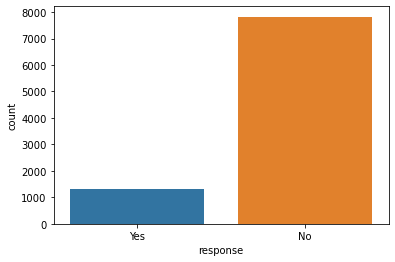

In [60]:
# Show a plot of the total number of responses:
sns.countplot(x='response', data=df1)
plt.show()

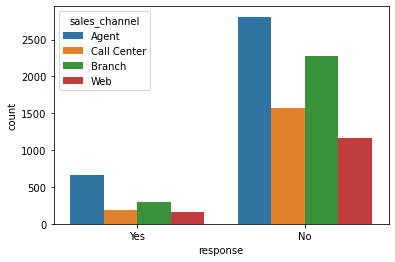

In [73]:
# Show a plot of the response rate by the sales channel:
sns.countplot(x='response', hue='sales_channel', data=df1)
plt.show()

In [90]:
#df2 = df1.copy()

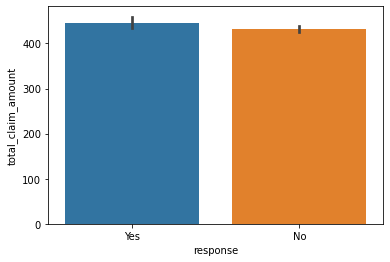

In [93]:
# Show a plot of the response rate by the total claim amount:
sns.barplot(x='response', y='total_claim_amount', data=df1)
plt.show()

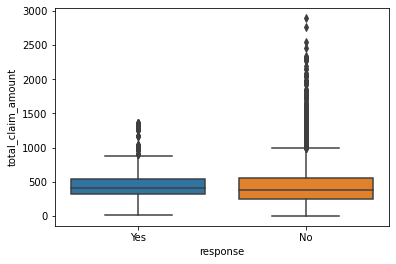

In [83]:
sns.boxplot(x='response', y='total_claim_amount', data=df1)
plt.show()

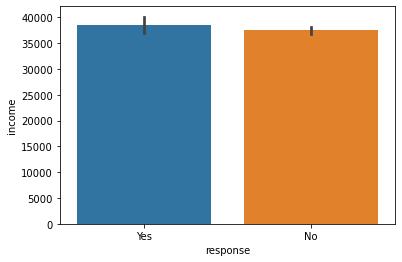

In [76]:
# Show a plot of the response rate by income:
sns.barplot(x='response', y='income', data=df1)
plt.show()

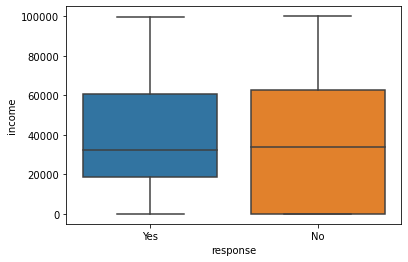

In [79]:
sns.boxplot(x='response', y='income', data=df1)
plt.show()